# <center>Actividad Semanal -- 7 Regresiones y K means</center>
## <center>CIENCIA Y ANALITICA DE DATOS</center>
## <center>Profesor: María de La Paz Rico</center>
## <center>Alumno: Guillermo Alfonso Muñiz Hermosillo - A01793101</center>
## <center><a href='https://colab.research.google.com/drive/1XYWc7A6WkHxNMCkBqhdHH_aiYAz2ocqT?usp=sharing'>COLLAB LINK</a></center>
## <center><a href='https://github.com/PosgradoMNA/actividades-de-aprendizaje-A01793101-GuillermoMuniz/tree/main/Acitividades%20Semanales/ActividadSemanal7-Regresiones%20y%20K%20means'>GITHUB LINK</a></center>

In [108]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Ejercicio 1. Costo en la industria de manufactura.

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
342,3.964185,45.018830
363,4.029570,39.009293
830,5.651714,37.722085
248,3.579993,44.520798
973,7.169644,25.311833
470,4.325755,38.136724
997,8.780888,25.973787
250,3.594700,39.824243
340,3.945410,31.552224
369,4.051758,48.312297


Verificando que no existan datos nulos.

In [110]:
df.isna().any()

Number of Units       False
Manufacturing Cost    False
dtype: bool

Obteniendo medidas estadisticas

In [111]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [112]:
df.columns

Index(['Number of Units', 'Manufacturing Cost'], dtype='object')

Para conocer la distribucion de nuestros datos, muestro la siguiente grafica de caja

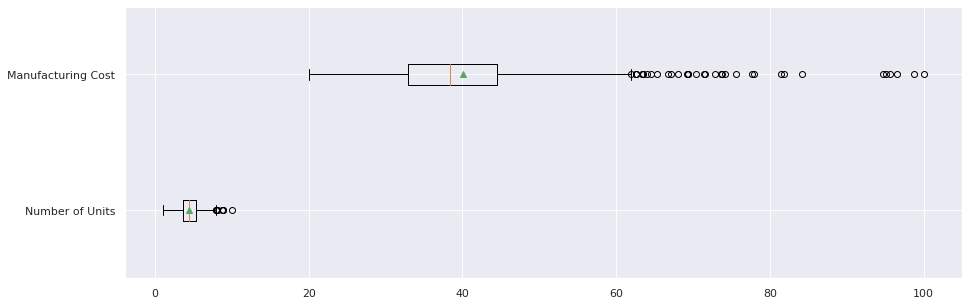

In [113]:
sns.set(rc={'figure.figsize':(15,5)})
plt.boxplot(df.to_numpy(), labels=df.columns, showmeans=True, vert=False)
plt.show()

Como podemos ver, Manufactiring cost tiene unos cuantos outliers y su magnitud es un poco mayor al number of units.

In [114]:
scaler = StandardScaler()
dfScaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
dfScaled.head()

,Number of Units,Manufacturing Cost
0,-2.600231,5.194801
1,-2.460970,5.333204
2,-2.456848,3.173583
3,-2.446910,5.242089
4,-2.376528,5.545221


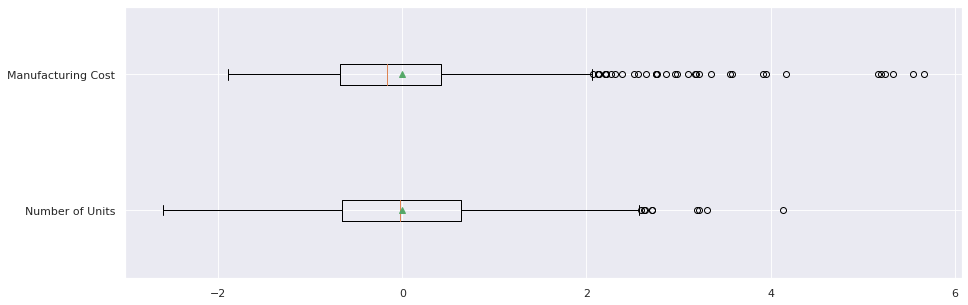

In [115]:
sns.set(rc={'figure.figsize':(15,5)})
plt.boxplot(dfScaled.to_numpy(), labels=dfScaled.columns, showmeans=True, vert=False)
plt.show()

## Divide los datos del costo de manufactura. 

Utilizar la función train_test_split.

In [116]:
X = dfScaled[['Number of Units']]
y = dfScaled['Manufacturing Cost']

In [117]:
xtrain, xtest, ytrain, ytest =  train_test_split(X, y, test_size=0.2, random_state=37)

In [118]:
def graficarPredicciones(x2, ypred):
    plt.scatter(X, y)
    plt.plot(x2, ypred, "r-", linewidth=2, label="Predictions")
    plt.xlabel("$X$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=14);
    plt.axis([-3, 6, -4, 7 ]);
    

## REGRESION LINEAL

### MODELADO

In [119]:
lr = LinearRegression(fit_intercept=True)
lr.fit(xtrain, ytrain)


LinearRegression()

#### La ecuacion generada con el conjunto de entrenamiento es:

In [120]:
lr.coef_, lr.intercept_

(array([-0.70277861]), -0.028711019387324004)

<center> $\hat{y} = -0.70277 X -0.02871 $ </center>

#### La visualizacion de este modelo generado es:

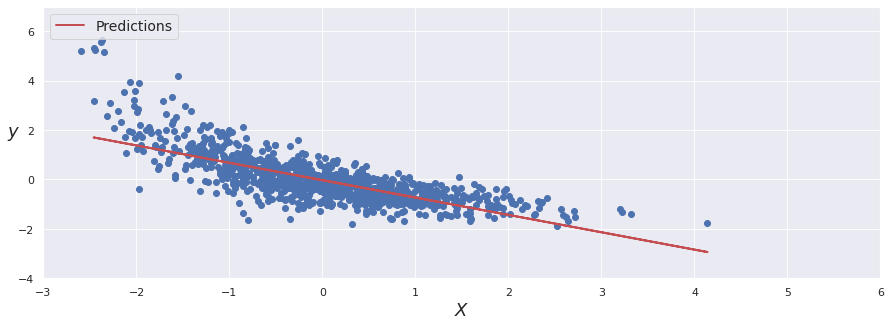

In [121]:
y_hat = lr.predict(xtrain)

graficarPredicciones(xtrain, y_hat)


#### Sus errores y su r squared son:

In [122]:
from sklearn import metrics
from sklearn.metrics import r2_score

maes = []
r2s = []
modelos = []
modelos.append('Linear Regression')
maes.append(metrics.mean_absolute_error(ytrain, y_hat))
r2s.append(r2_score(ytrain, y_hat))

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, y_hat)))
print('r2_score',r2_score(ytrain, y_hat))

Error medio Absoluto (MAE): 0.44487025252822726
Root Mean Squared Error: 0.6125472434542465
r2_score 0.555997358980481


## REGRESION POLINOMIAL

### MODELO

In [123]:
from sklearn.preprocessing import PolynomialFeatures

polyfeat = PolynomialFeatures(degree=3, include_bias=False)
Xpoly = polyfeat.fit_transform(xtrain)

In [124]:
lrpoly = LinearRegression(fit_intercept=True)
lrpoly.fit(Xpoly, ytrain)

LinearRegression()

#### La ecuacion generada con el conjunto de entrenamiento es:

In [125]:
lrpoly.coef_, lrpoly.intercept_

(array([-0.62117566,  0.2198283 , -0.04569872]), -0.2262232795624534)

<center> $\hat{y} = -0.62117 X + 0.21982 X^2 -0.04569 X^3 -0.22622 $ </center>

#### La visualizacion de este modelo generado es:

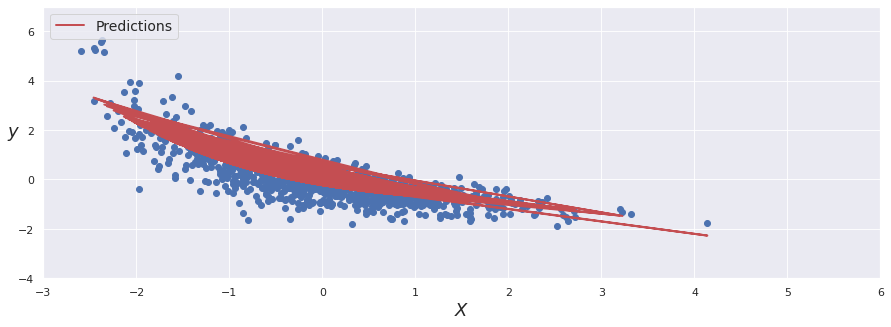

In [126]:
y_hatpoly = lrpoly.predict(Xpoly)
graficarPredicciones(xtrain, y_hatpoly)

#### Sus errores y su r squared son:

In [127]:
modelos.append('Polinomial Regression')
maes.append(metrics.mean_absolute_error(ytrain, y_hatpoly))
r2s.append(r2_score(ytrain, y_hatpoly))

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, y_hatpoly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, y_hatpoly)))
print('r2_score',r2_score(ytrain, y_hatpoly))

Error medio Absoluto (MAE): 0.41470261009919945
Root Mean Squared Error: 0.5499221716410964
r2_score 0.6421435631309922


## Realiza la regresión con Ridge y Lasso

### MODELOS

In [128]:
RidgeModel = Ridge(alpha = 0.01)
RidgeModel.fit(xtrain, ytrain)

LassoModel = Lasso(alpha = 0.01)
LassoModel.fit(xtrain, ytrain)

Lasso(alpha=0.01)

#### La ecuacion generada por AMBOS MODELOS con el conjunto de entrenamiento es:

In [129]:
RidgeModel.coef_, RidgeModel.intercept_

(array([-0.70276938]), -0.028711128933458743)

<center> $\hat{y} = -0.70276 X -0.02871 $ </center>

In [130]:
LassoModel.coef_, LassoModel.intercept_

(array([-0.69226697]), -0.028835721615773094)

<center> $\hat{y} = -0.69226 X -0.02883 $ </center>

#### La visualizacion de este modelo generado es:

- RIDGE

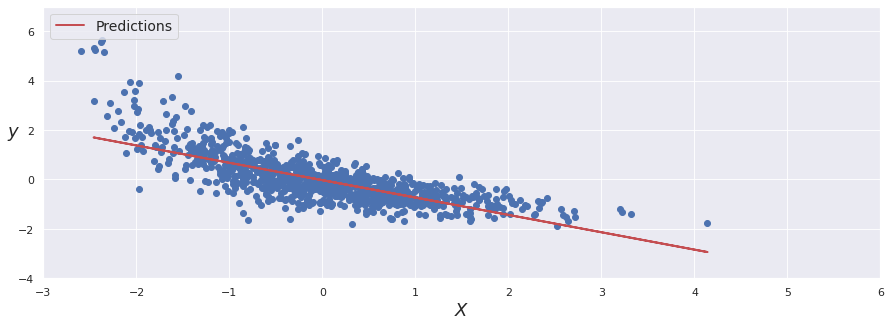

In [131]:
y_hatRidge = RidgeModel.predict(xtrain)

graficarPredicciones(xtrain, y_hatRidge)


- LASSO

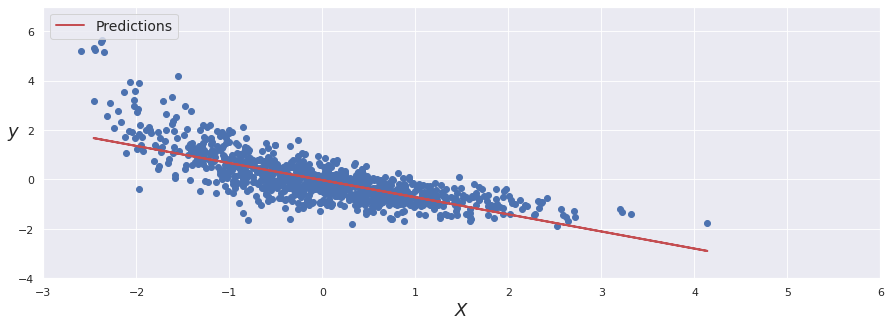

In [132]:
y_hatLasso = LassoModel.predict(xtrain)

graficarPredicciones(xtrain, y_hatLasso)

#### Sus errores y su r squared son:

- Ridge

In [133]:
modelos.append('Ridge')
maes.append(metrics.mean_absolute_error(ytrain, y_hatRidge))
r2s.append(r2_score(ytrain, y_hatRidge))

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, y_hatRidge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, y_hatRidge)))
print('r2_score',r2_score(ytrain, y_hatRidge))

Error medio Absoluto (MAE): 0.444869731029353
Root Mean Squared Error: 0.6125472435204601
r2_score 0.5559973588844915


- Lasso

In [134]:
modelos.append('Lasso')
maes.append(metrics.mean_absolute_error(ytrain, y_hatLasso))
r2s.append(r2_score(ytrain, y_hatLasso))

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, y_hatLasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, y_hatLasso)))
print('r2_score',r2_score(ytrain, y_hatLasso))

Error medio Absoluto (MAE): 0.4443075550254994
Root Mean Squared Error: 0.6126330401812333
r2_score 0.5558729713790165


## GRAFICAR MAE y R2

- MAE

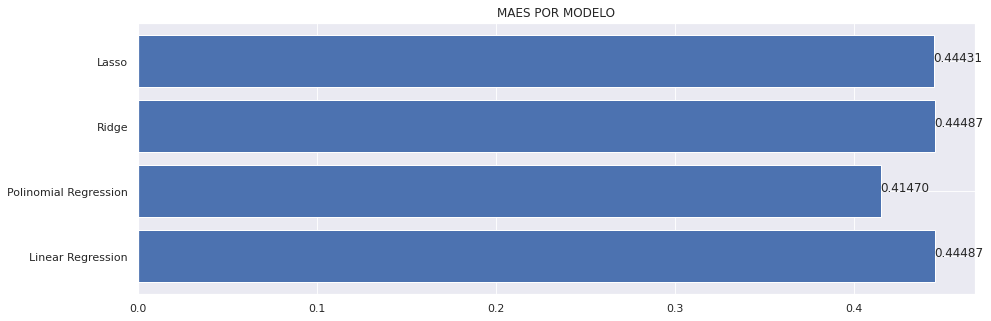

In [135]:
import matplotlib.pyplot as plt

plt.barh(modelos, maes)
plt.title('MAES POR MODELO')
for index, value in enumerate(maes):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

- R SQUARED

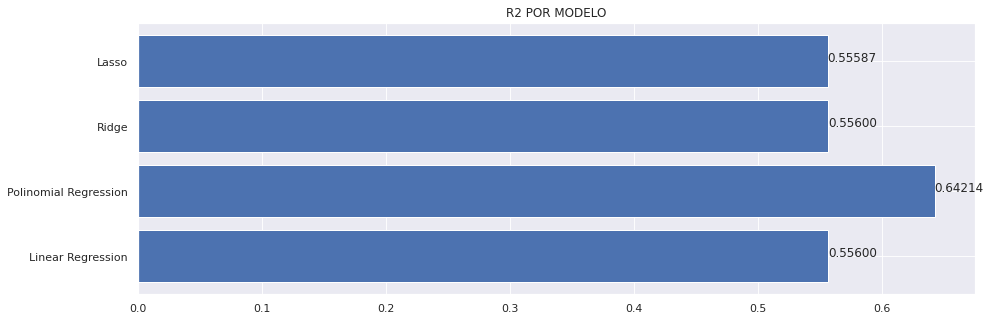

In [136]:
plt.barh(modelos, r2s)
plt.title('R2 POR MODELO')
for index, value in enumerate(r2s):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

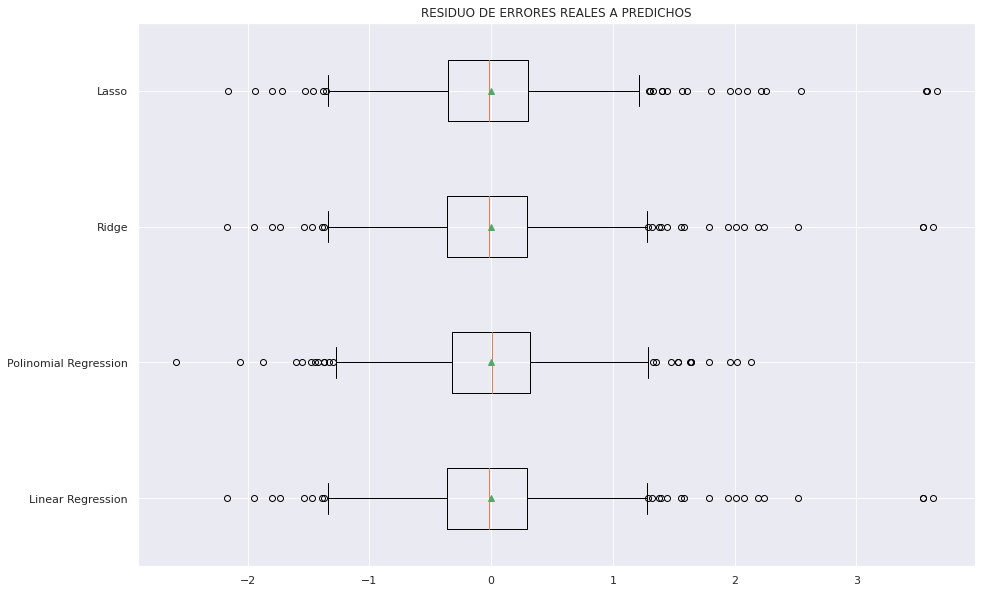

In [137]:
sns.set(rc={'figure.figsize':(15,10)})
resid = [ytrain-y_hat, ytrain-y_hatpoly, ytrain-y_hatRidge, ytrain-y_hatLasso]
plt.boxplot(resid, labels=modelos, showmeans=True,  vert=False)
plt.title('RESIDUO DE ERRORES REALES A PREDICHOS')
plt.show()

## Explica tus resultados:
- Que método conviene más a la empresa, ¿por que?

Por el momento el que parece ser mas conveniente a la empresa es la regresion polinomial. Ya que sus predicciones son mas certeras que los otros modelos. Con un error de 0.64 promedio es el que tiene mejor desempeño en el conjunto de validacion.
- ¿Que porcentajes de entrenamiento y evaluación usaste? 

Use 80 % del conjunto de datos para entrenamiento y validacion y 20% lo deje destinado a Prueba.
- ¿Que error tienes? ¿es bueno?, ¿cómo lo sabes?

El MAE de 0.414 del modelo polinomial es el mejor. Lo sabemos porque mientras mas cercano sea el MAE a 0, mas preciso sera nuestro modelo. Lo sabemos porque este error es el promedio de los errores absolutos en nuestro conjunto de datos. 

# Ejercicio 2. Regresión múltiple.

Comenzamos leyendo nuestro conjunto de datos y verificando si existen nulos

In [138]:
dfhouses = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
dfhouses.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12615,2070100040,20141201T000000,467000.0,3,1.75,2660,5511,1.0,0,0,...,8,1330,1330,1948,0,98108,47.5575,-122.300,2030,6111
11884,5631501323,20140805T000000,309500.0,3,1.50,1340,13560,1.0,0,0,...,7,1340,0,1968,0,98028,47.7410,-122.234,1540,15000
2881,3530530110,20150217T000000,149900.0,2,1.75,1090,1950,1.0,0,0,...,8,1090,0,1982,0,98198,47.3782,-122.319,1360,3426
18654,2114700384,20150427T000000,280000.0,3,2.50,1020,2217,2.0,0,0,...,7,720,300,2004,0,98106,47.5343,-122.348,1060,1524
7868,8089500180,20140730T000000,1150000.0,4,3.50,4540,19767,2.0,0,0,...,11,4200,340,1998,0,98006,47.5445,-122.137,3990,12881
11083,4276400030,20141112T000000,450000.0,3,2.00,2320,17688,1.0,0,0,...,8,2320,0,1952,1994,98166,47.4519,-122.363,1610,14482
3570,9460000110,20140924T000000,280000.0,3,1.75,2630,6500,1.0,0,0,...,7,1330,1300,1958,0,98055,47.4878,-122.221,2520,6500
15539,1214000080,20140626T000000,329950.0,3,1.00,1750,7800,1.0,0,0,...,7,1150,600,1956,0,98166,47.4596,-122.343,1750,7560
17838,3024059057,20150501T000000,1650000.0,4,4.50,5550,16065,2.0,0,0,...,9,3880,1670,2003,0,98040,47.5455,-122.214,3470,16488
10238,3345100002,20141217T000000,730000.0,4,2.75,3440,8150,2.0,0,0,...,10,3440,0,2014,0,98056,47.5168,-122.189,2560,8315


In [139]:
dfhouses.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Eliminamos datos no relevantes

In [140]:
dfhouses.drop('id', axis = 1, inplace = True)
dfhouses.drop('date', axis = 1, inplace = True)
dfhouses.drop('zipcode', axis = 1, inplace = True)
dfhouses.drop('lat', axis = 1, inplace = True)
dfhouses.drop('long', axis = 1, inplace = True)

Obtenemos las medidas estadisticas

In [141]:
dfhouses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


Escalamos nuestro conjunto de datos para tener datos normalizados

In [142]:
dfScaHouse = pd.DataFrame(scaler.fit_transform(dfhouses), columns=dfhouses.columns)
dfScaHouse.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.272190,-0.192849


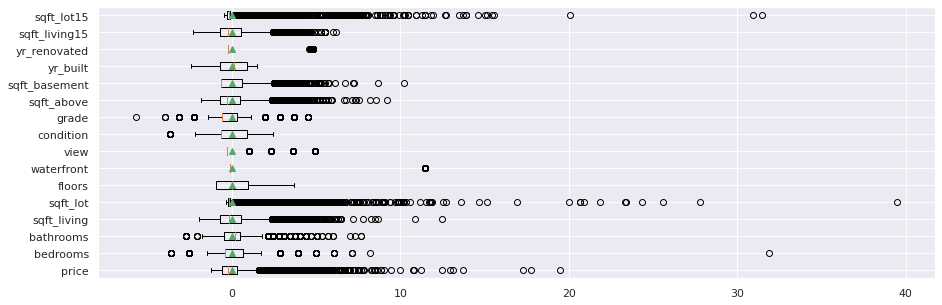

In [143]:
sns.set(rc={'figure.figsize':(15,5)})
plt.boxplot(dfScaHouse.to_numpy(), labels=dfScaHouse.columns, showmeans=True, vert=False)
plt.show()

In [144]:
yhouse = dfScaHouse['price']
Xhouse = dfScaHouse.loc[:, dfScaHouse.columns != 'price']

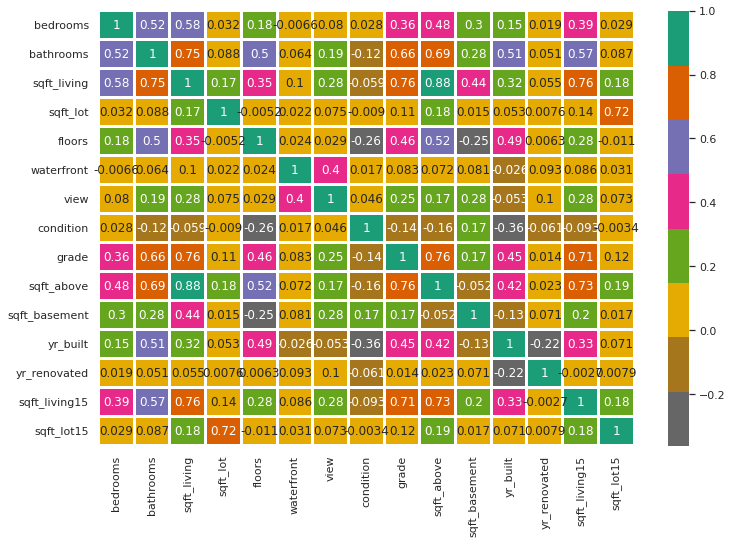

In [145]:
plt.figure(figsize=(12,8)) 
sns.heatmap(Xhouse.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

## Divide los datos. 

Utiliza la función train_test_split

In [146]:
XtrainH, XtestH, ytrainH, ytestH = train_test_split(Xhouse, yhouse, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(Xhouse)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(XtrainH)}')
print(f'Tamaño de X_train: {XtrainH.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(XtestH)}')
print(f'Tamaño del X_test: {XtestH.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


## Regresión Múltiple Lineal

### MODELO

In [147]:
lrHouse = LinearRegression()
lrHouse.fit(XtrainH, ytrainH)

LinearRegression()

In [148]:
lrHouse.coef_, lrHouse.intercept_

(array([-8.49373282e-02,  8.29572558e-02,  1.34076744e+13,  3.19633535e-04,
         4.71070593e-02,  1.30860436e-01,  8.63454234e-02,  3.66019652e-02,
         3.82672571e-01, -1.20887193e+13, -6.46084260e+12, -2.84053071e-01,
         1.25985923e-02,  5.29822807e-02, -3.90266766e-02]),
 -0.002892357793083432)

#### La visualizacion de este modelo generado es:

In [149]:
y_hatLRHous = lrHouse.predict(XtrainH)
y_hatLRHous

array([ 1.5899611 ,  2.03016508,  1.15105917, ..., -0.50524208,
       -0.23706149, -0.54670679])

#### Sus errores y su r squared son:

In [150]:
maesH = []
r2sH = []
residH = []
maesH.append(metrics.mean_absolute_error(ytrainH, y_hatLRHous))
r2sH.append(r2_score(ytrainH, y_hatLRHous))
residH.append(ytrainH-y_hatLRHous)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrainH, y_hatLRHous))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrainH, y_hatLRHous)))
print('r2_score',r2_score(ytrainH, y_hatLRHous))

Error medio Absoluto (MAE): 0.3801957937264814
Root Mean Squared Error: 0.5835971614744226
r2_score 0.6528725163450275


## REGRESION POLINOMIAL

### MODELO

In [151]:
polyfeatH = PolynomialFeatures(degree=8, include_bias=False)
XpolyH = polyfeat.fit_transform(XtrainH)

In [152]:
lrpolyH = LinearRegression(fit_intercept=True)
lrpolyH.fit(XpolyH, ytrainH)

LinearRegression()

#### La ecuacion generada con el conjunto de entrenamiento es:

In [153]:
lrpolyH.coef_[0:30], lrpolyH.intercept_

(array([ 2.49310414e+08, -7.49967135e-02, -1.01720819e-01,  6.82339365e-01,
         6.11904319e-02,  1.17439777e-04,  5.04409043e-01, -3.91473610e-01,
        -6.04808889e-02, -2.49721352e-01,  2.66113028e-01, -5.90875831e-01,
        -3.65619600e+01,  1.98318530e-01,  1.79742400e-01, -7.50380009e-03,
         1.25152394e-02, -3.68860364e-03, -1.87834725e-02,  3.78385149e-02,
         2.83822898e+09,  2.51857787e-02,  1.31868571e-03, -3.36515903e-03,
         1.77266449e-03, -1.09218955e-02, -5.33830747e-02,  1.00634433e+00,
        -6.80588931e-03,  6.17225021e-02]), -8.64770484687528)

#### Sus errores y su r squared son:

In [154]:
y_hatPRHous = lrHouse.predict(XtrainH)

maesH.append(metrics.mean_absolute_error(ytrainH, y_hatPRHous))
r2sH.append(r2_score(ytrainH, y_hatPRHous))
residH.append(ytrainH-y_hatPRHous)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrainH, y_hatPRHous))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrainH, y_hatPRHous)))
print('r2_score',r2_score(ytrainH, y_hatPRHous))

Error medio Absoluto (MAE): 0.3801957937264814
Root Mean Squared Error: 0.5835971614744226
r2_score 0.6528725163450275


## Realiza la regresión con Ridge y Lasso

### MODELOS

In [155]:
RidgeModelH = Ridge(alpha = 0.10)
RidgeModelH.fit(XtrainH, ytrainH)

LassoModelH = Lasso(alpha = .01)
LassoModelH.fit(XtrainH, ytrainH)

Lasso(alpha=0.01)

#### La ecuacion generada por AMBOS MODELOS con el conjunto de entrenamiento es:

In [156]:
RidgeModelH.coef_, RidgeModelH.intercept_

(array([-0.09677458,  0.08698747,  0.20267555,  0.00193318,  0.04661381,
         0.13024659,  0.08610179,  0.03761732,  0.38258574,  0.16861035,
         0.10511393, -0.28409989,  0.01450908,  0.05415352, -0.04076566]),
 -0.00150914396023756)

In [157]:
LassoModelH.coef_, LassoModelH.intercept_

(array([-0.06984475,  0.07145965,  0.38742126, -0.        ,  0.02973128,
         0.12411084,  0.0880468 ,  0.02807131,  0.38116594,  0.        ,
         0.00518928, -0.26357658,  0.010054  ,  0.04219924, -0.0274872 ]),
 -0.0015428850748442054)

#### Sus errores y su r squared son:

- Ridge

In [158]:
y_hatRidgeH = RidgeModelH.predict(XtrainH)

maesH.append(metrics.mean_absolute_error(ytrainH, y_hatRidgeH))
r2sH.append(r2_score(ytrainH, y_hatRidgeH))
residH.append(ytrainH-y_hatRidgeH)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrainH, y_hatRidgeH))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrainH, y_hatRidgeH)))
print('r2_score',r2_score(ytrainH, y_hatRidgeH))

Error medio Absoluto (MAE): 0.3793574029075837
Root Mean Squared Error: 0.5835575262820814
r2_score 0.6529196652973683


- Lasso

In [159]:
y_hatLassoH = LassoModelH.predict(XtrainH)

maesH.append(metrics.mean_absolute_error(ytrain, y_hatLasso))
r2sH.append(r2_score(ytrain, y_hatLasso))
residH.append(ytrainH-y_hatLassoH)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytrain, y_hatLasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, y_hatLasso)))
print('r2_score',r2_score(ytrain, y_hatLasso))

Error medio Absoluto (MAE): 0.4443075550254994
Root Mean Squared Error: 0.6126330401812333
r2_score 0.5558729713790165


## GRAFICAR MAE y R2

- MAE

In [160]:
modelos

['Linear Regression', 'Polinomial Regression', 'Ridge', 'Lasso']

In [161]:
maesH

[0.3801957937264814,
 0.3801957937264814,
 0.3793574029075837,
 0.4443075550254994]

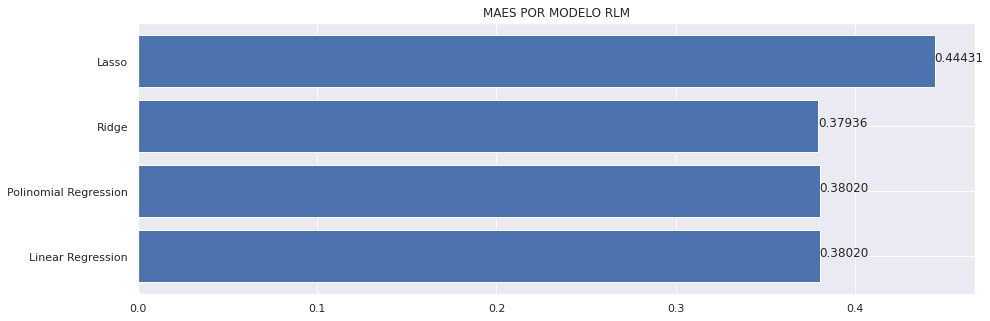

In [162]:
plt.barh(modelos, maesH)
plt.title('MAES POR MODELO RLM')
for index, value in enumerate(maesH):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

- R SQUARED

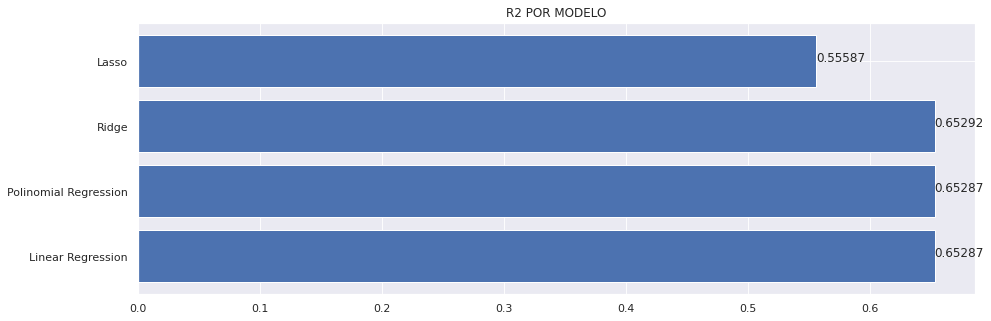

In [163]:
plt.barh(modelos, r2sH)
plt.title('R2 POR MODELO')
for index, value in enumerate(r2sH):
    plt.text(value, index,
             str('{:.5f}'.format(value)))

plt.show()

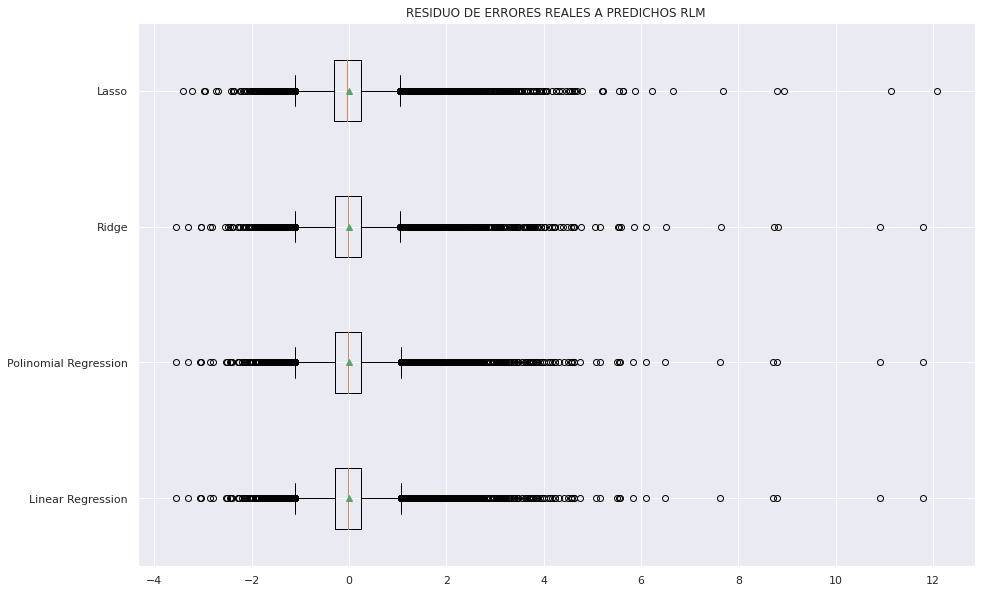

In [164]:
sns.set(rc={'figure.figsize':(15,10)})
plt.boxplot(residH, labels=modelos, showmeans=True,  vert=False)
plt.title('RESIDUO DE ERRORES REALES A PREDICHOS RLM')
plt.show()

## Explica tus resultados:
- Que método conviene más a la empresa, ¿por que?

Por el momento el que parece ser mas conveniente a la empresa es el modelo con correccion Rigge. Ya que sus predicciones son mas certeras que los otros modelos. Con un error de 0.65 promedio y un MAE de 0.35 es el que tiene mejor desempeño en el conjunto de validacion.
- ¿Que porcentajes de entrenamiento y evaluación usaste? 

Use 90 % del conjunto de datos para entrenamiento y validacion y 10% lo deje destinado a Prueba.
- ¿Que error tienes? ¿es bueno?, ¿cómo lo sabes?

El MAE de 0.379 del modelo RIDGE es el mejor. Lo sabemos de la misma manera que en el ejercicio 1. Mientras mas cercano sea el MAE a 0, mas preciso sera nuestro modelo.  Este error es el promedio de los errores absolutos en nuestro conjunto de datos. 

## Agrega las conclusiones

Como podemos ver, el modelo de Regresion Lineal Multiple con correccion Ridge y alpha de 0.10 nos entrega un mejor desempeño que cualquier otro modelo que hayamos probado.
Si bien es cierto que el R2 deberia de ser un poco mayor por lo que quiza haga falta realizar alguna transformacion adicional para verificar estos valores.

Por el momento para ambos ejercicios podemos deducir que los metodos de regresion nos ayudan a encontrar una funcion para poder predecir nuestra variable de salida. Necesitamos ser precisos con nuestro preprocesamiento de nuestros datos y encontrar las mejores soluciones posibles.

# EJERCICIO 3 - KMEANS

In [185]:
from tqdm import tqdm
import geopandas as gpd

url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
dfKmeans=pd.read_csv(url)

In [166]:
dfKmeans.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [167]:
dfKmeans.isna().any()

name         False
latitude     False
longitude    False
address      False
phone        False
website      False
dtype: bool

In [168]:
latlong=dfKmeans[["latitude","longitude"]]

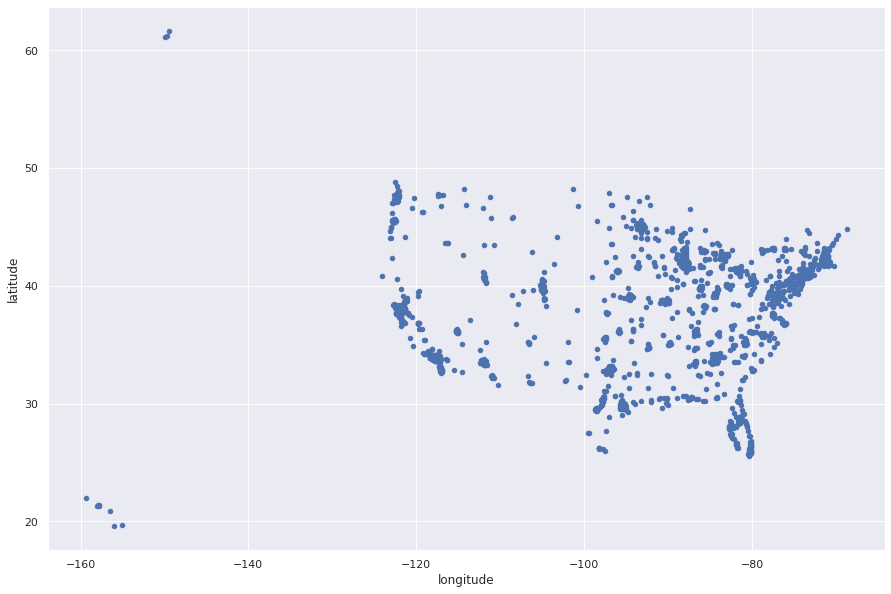

In [169]:
latlong.plot.scatter( "longitude","latitude")

In [186]:
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();

dfKmeans["Coordinates"] = list(zip(dfKmeans.longitude, dfKmeans.latitude))
dfKmeans["Coordinates"] = dfKmeans["Coordinates"].apply(Point)
dfKmeans.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [171]:
gdf = gpd.GeoDataFrame(dfKmeans, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [172]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


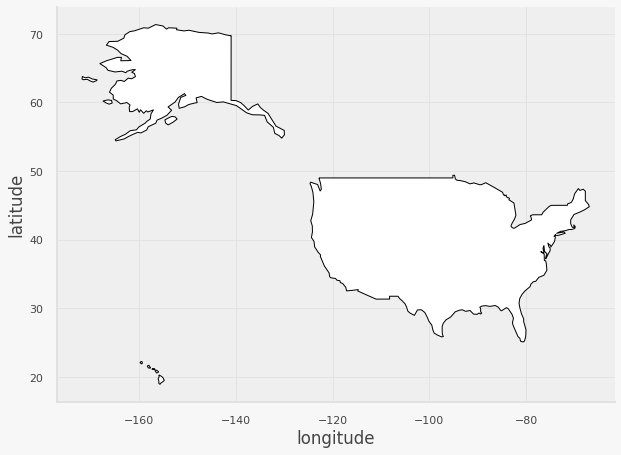

In [173]:
import warnings
warnings.filterwarnings('ignore')

fig, gax = plt.subplots(figsize=(10,10))
# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

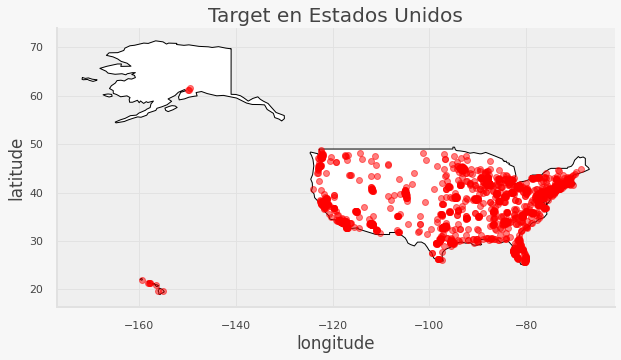

In [174]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Convertimos nuestras ubicaciones a un arreglo de Numpy para poder obtener los centros de Kmeans

In [175]:
XKmeans = np.array(latlong.values.tolist())
XKmeans[0:5]

array([[ 33.2242254, -86.8041737],
       [ 33.3345501, -86.9897779],
       [ 30.6028747, -87.8959317],
       [ 34.5601477, -86.9715595],
       [ 31.2660613, -85.4464222]])

Para encontrar nuestro mejor lugar en el almacen, se necesita encontrar el numero optimo de centroids para poder colocar en esas ubicaciones los almacenes de manera que esten distribuidos especificamente

In [176]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

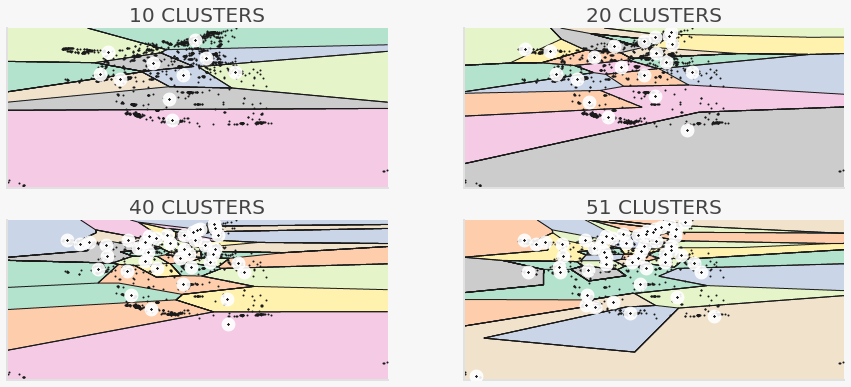

In [177]:
from sklearn.cluster import KMeans

kmeans_iter1 = KMeans(n_clusters=10, init="random", n_init=1, max_iter=10,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=20, init="random", n_init=1, max_iter=10,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=40, init="random", n_init=1, max_iter=10,
                      random_state=5)
kmeans_iter4 = KMeans(n_clusters=51, init="random", n_init=1, max_iter=10,
                      random_state=5)
kmeans_iter1.fit(XKmeans)
kmeans_iter2.fit(XKmeans)
kmeans_iter3.fit(XKmeans)
kmeans_iter4.fit(XKmeans)

plt.figure(figsize=(15, 10))
plt.subplot(321)
plot_decision_boundaries(kmeans_iter1, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter1.cluster_centers_)
plt.title("10 CLUSTERS")


plt.subplot(322)
plot_decision_boundaries(kmeans_iter2, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.title("20 CLUSTERS")



plt.subplot(323)
plot_decision_boundaries(kmeans_iter3, XKmeans, show_centroids=False, show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.title("40 CLUSTERS")

plt.subplot(324)
plot_decision_boundaries(kmeans_iter4, XKmeans, show_centroids=False, show_ylabels=False,show_xlabels=False)
plot_centroids(kmeans_iter4.cluster_centers_)
plt.title("51 CLUSTERS")

plt.show()

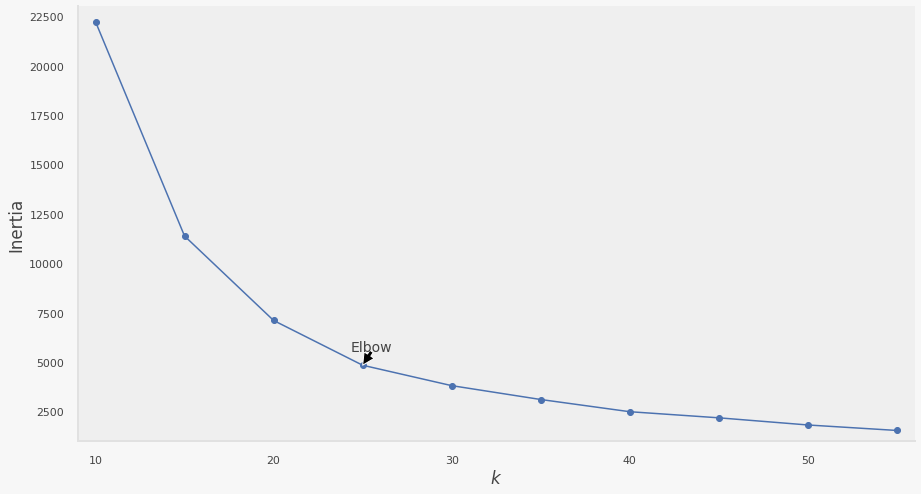

In [178]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(XKmeans)
                for k in range(10, 60, 5)]
inertias = [model.inertia_ for model in kmeans_per_k]
l = [] 
for k in kmeans_per_k:
    l.append(k.n_clusters)
plt.figure(figsize=(15, 8))
plt.plot(l, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(25, inertias[3]), xytext=(25.5, 5550),
             arrowprops=dict(facecolor='black', shrink=0.001))
plt.text(25.5, 5550, "Elbow", horizontalalignment="center")
plt.axis([9, 56, 1000, 23000])
plt.grid()
plt.show()

Por lo visto en las anteriores graficas, tomaremos como 25 el numero de clusters, lo que quiere decir 25 almacenes.

Text(0.5, 1.0, '25 CLUSTERS')

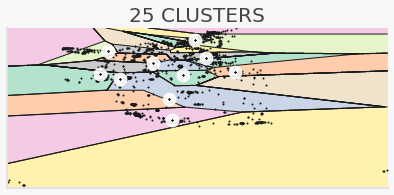

In [179]:
kmeans_final = KMeans(n_clusters=25, init="random", n_init=1, max_iter=30,
                      random_state=5)
kmeans_final.fit(XKmeans)
plt.figure(figsize=(15, 10))
plt.subplot(321)
plot_decision_boundaries(kmeans_final, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter1.cluster_centers_)
plt.title("25 CLUSTERS")

En la grafica anterior, podemos verificar como quedaran los almacenes respecto a las tiendas.
A continuacion lo veremos en el mapa

### Encuentra las latitudes y longitudes de los almacenes

In [180]:
dfCoordinates = pd.DataFrame(kmeans_final.cluster_centers_, columns=['lat', 'long'])
dfCoordinates["Coordinates"] = list(zip(dfCoordinates.long, dfCoordinates.lat))
dfCoordinates["Coordinates"] = dfCoordinates["Coordinates"].apply(Point)
dfCoordinates = gpd.GeoDataFrame(dfCoordinates, geometry="Coordinates")


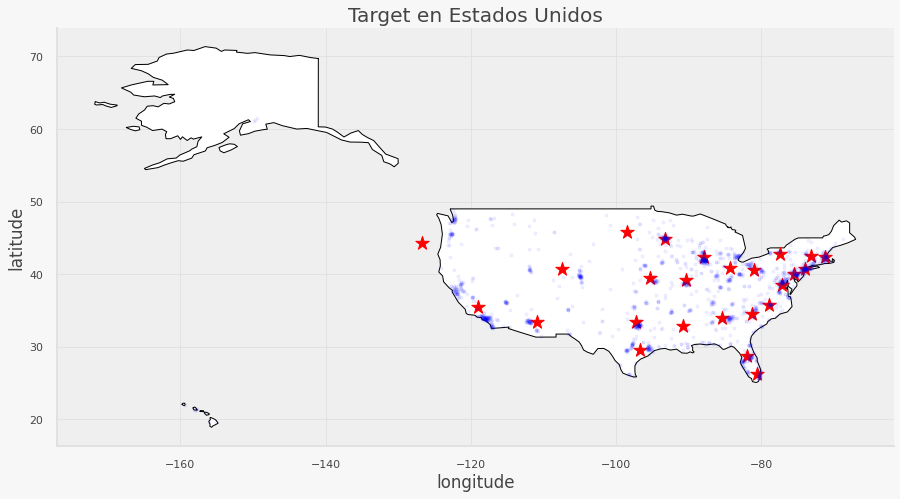

In [181]:
fig, gax = plt.subplots(figsize=(15,10))


world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


dfCoordinates.plot(ax=gax, color='red', marker = "*", markersize = 200)
gdf.plot(ax=gax, color='blue', alpha = 0.05, marker= ".")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Como podemos observar, existe un punto marcado como almacen fuera de tierra firme, para ese caso necesitariamos ajustar nuestro modelo para tener un rango de coordenadas en las que se pueden construir los almacenes

### ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

In [182]:
columnsKm = np.arange(1, 26, 1)
columnsKm.sort()
distancesKm = pd.DataFrame(kmeans_final.transform(XKmeans).round(2), columns=columnsKm)
distancesKm = pd.DataFrame({'Almacen': distancesKm.idxmin(axis=1), 'Distance': distancesKm.min(axis=1)})


<BarContainer object of 25 artists>

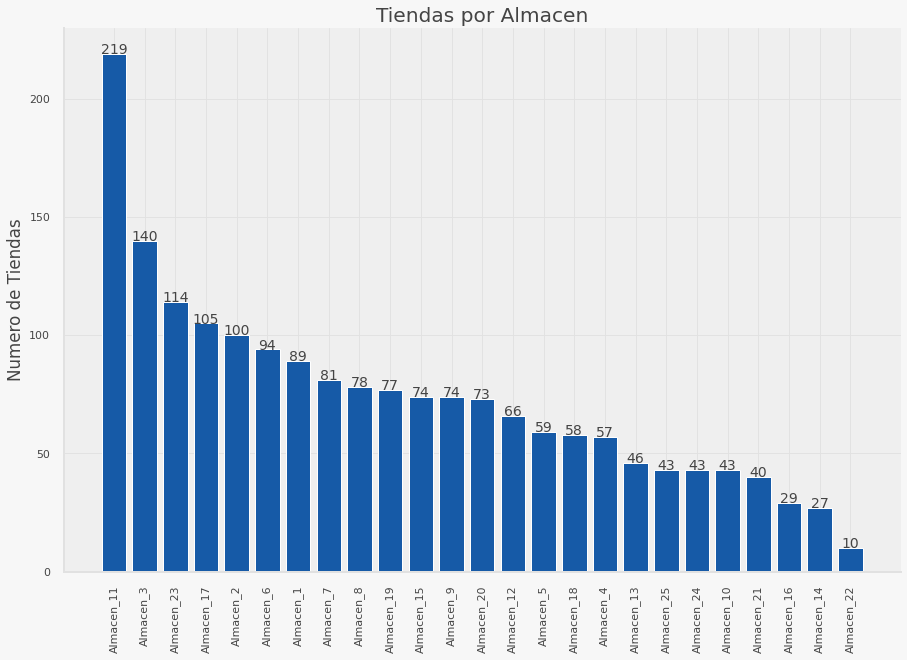

In [183]:
yax = distancesKm['Almacen'].value_counts().values
xax = ['Almacen_' + str(x) for x in np.array(distancesKm['Almacen'].value_counts().index)]
plt.title('Tiendas por Almacen')
plt.ylabel('Numero de Tiendas')
for i in range(len(xax)):
    plt.text(i, yax[i], yax[i], ha = 'center')
plt.xticks(rotation = 90)
plt.bar(xax, yax)

En el grafico anterior observamos el numero de tiendas a la que cada almacen va a abastecer. En el dataframe podremos observar a que distancia estara.

In [184]:
distancesKm.loc[distancesKm['Almacen'] == 22]

,Almacen,Distance
931,22,2.06
1275,22,2.50
1276,22,1.94
1277,22,2.51
1278,22,3.70
1481,22,0.36
1482,22,5.00
1483,22,1.68
1484,22,2.87
1485,22,2.92


### ¿Cómo elegiste el número de almacenes?

El numero de almacenes se eligio al sacar la grafica de Elbow, la cual indica en que numero de clusters la particion en mas empieza a no ser significativa para el promedio de las distancias al centro del grupo.

## ¿Qué librerías nos pueden ayudar a graficar este tipo de datos?

Las librerias que nos han ayudado en esta practica son todas aquellas de graficos geograficos, matplolib y seaborn. Asi como las librerias para encontrar nuestros modelos optimos y convertir datos. 

## ¿Consideras importante que se grafique en un mapa?, ¿por qué?

Para este caso de K-Mean fue muy importante el graficar en un mapa, ya que pudimos no solo observar la distribucion de las tiendas sino tambien observamos como nuestras predicciones pueden ser erroneas para el caso, como el caso del almacen que no esta en una cordenada con tierra firme. 
Fue importante poder observar visualmente esta informacion y ayudo a tomar decisiones importantes.

## Conclusiones

El metodo de K-means es un metodo de predicciones para datos no etiquetados muy util, ya que para estos casos nos permite conocer, detectar y agrupar nuestros datos para poder realizar las predicciones con un alto grado de precision. En este caso particular al utilizar esta tecnica nos ayudo a identificar el numero y ubicacion de los posibles almacenes algo que definitivamente ayudaria a nuestra empresa a reducir costos y tomar decisiones inteligentes sin depender de datos etiquetados.

K-means me parecio un metodo super interesante ya que el aprendizaje no supervisado me parece que es una parte primordial del aprendizaje automatico y debemos de ser capaces de llevar a cabo estos metodos con precision para poder resolver las necesidades del mundo actual.